In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101)

In [4]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [5]:
X,y = data

In [6]:
X[:10]

array([[ -8.87772115,  -6.76007802],
       [  0.630638  ,   3.10707466],
       [ -0.24060881,   2.82068999],
       [ -7.83909113,  -8.20754485],
       [-10.9729082 ,  -7.39067645],
       [-10.81648852,  -5.82372891],
       [  0.96977807,   0.50825184],
       [-10.29728144,  -7.21832357],
       [  0.04271579,   3.50389089],
       [  0.15391601,   2.19349145]])

In [7]:
y[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [8]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [9]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
feat = pd.DataFrame(X)

In [11]:
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [12]:
feat = pd.concat([feat, z_noise], axis=1)

In [13]:
feat.columns = ['X1','X2','X3']

In [14]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


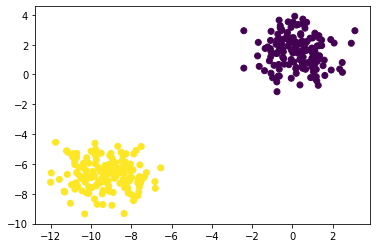

In [15]:
plt.scatter(feat['X1'], feat['X2'], c=y);

In [16]:
from mpl_toolkits.mplot3d import Axes3D

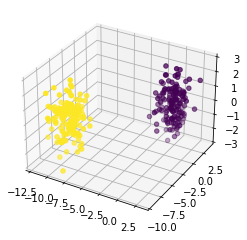

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y);

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
from tensorflow.keras.optimizers import SGD

In [20]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [21]:
decoder =  Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [22]:
autoencoder = Sequential([encoder,decoder])

In [23]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [26]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1633
Epoch 3/5
10/10 [==============================] - 0s 864us/step - loss: 0.1652
Epoch 4/5
10/10 [==============================] - 0s 886us/step - loss: 0.2297
Epoch 5/5
10/10 [==============================] - 0s 997us/step - loss: 0.2228


In [27]:
encoded_data = encoder.predict(scaled_data)

In [28]:
encoded_data[:10]

array([[0.40698418, 0.        ],
       [0.20215425, 0.8317001 ],
       [0.21637848, 0.7295667 ],
       [0.19360581, 0.        ],
       [0.08460546, 0.        ],
       [0.        , 0.        ],
       [0.08965978, 0.95417285],
       [0.09723884, 0.        ],
       [0.        , 1.0718    ],
       [0.22440091, 0.7633502 ]], dtype=float32)

In [29]:
scaled_data.shape

(300, 3)

In [30]:
encoded_data.shape

(300, 2)

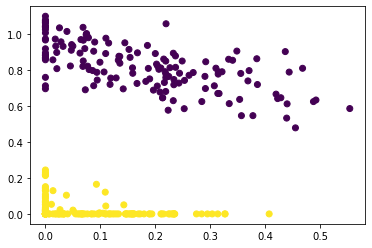

In [31]:
plt.scatter(encoded_data[:,0], encoded_data[:,1], c=y)